## Here's the .ipynb to write the code!
Group name: <br>
Group members:

#### Analyse Datasets

In [1]:
# import packages in this cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
from collections import defaultdict
import os

In [2]:
metadata_df=pd.read_csv("Datasets/music_genre1.csv")

In [3]:
metadata_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
# check missing value
print(metadata_df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [6]:
# check for duplicate row in datasets
print(metadata_df.duplicated().sum()) 

0


In [7]:
# Filter and print rows with any null values
metadata_df[metadata_df.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [8]:
# Handle missing value of the datasets 
# We replace the null value with "Unknown" since it is a qualitative value (not sure this is the best approach or not)
metadata_df_filled =metadata_df.fillna('Unknown')

In [9]:
print(metadata_df_filled.isnull().sum()) 

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [10]:
unique_genres = metadata_df_filled['track_genre'].unique()
print(unique_genres)
print(len(unique_genres))

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [11]:
# The datasets are very balance (since it has same counts for every genres)
pd.set_option('display.max_rows', None)
genre_counts = metadata_df_filled['track_genre'].value_counts()
print(genre_counts)

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
kids                 1000
k-pop                1000
jazz                 1000
j-rock               1000
j-pop                1000
j-idol               1000
j-dance              1000
iranian              1000
psych-rock           1000
punk                 1000
afrobeat             1000
r-n-b                1000
turkish              1000
trip-hop             1000
trance               1000
techno               1000
tango                1000
synth-pop            1000
swedish              1000


In [12]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

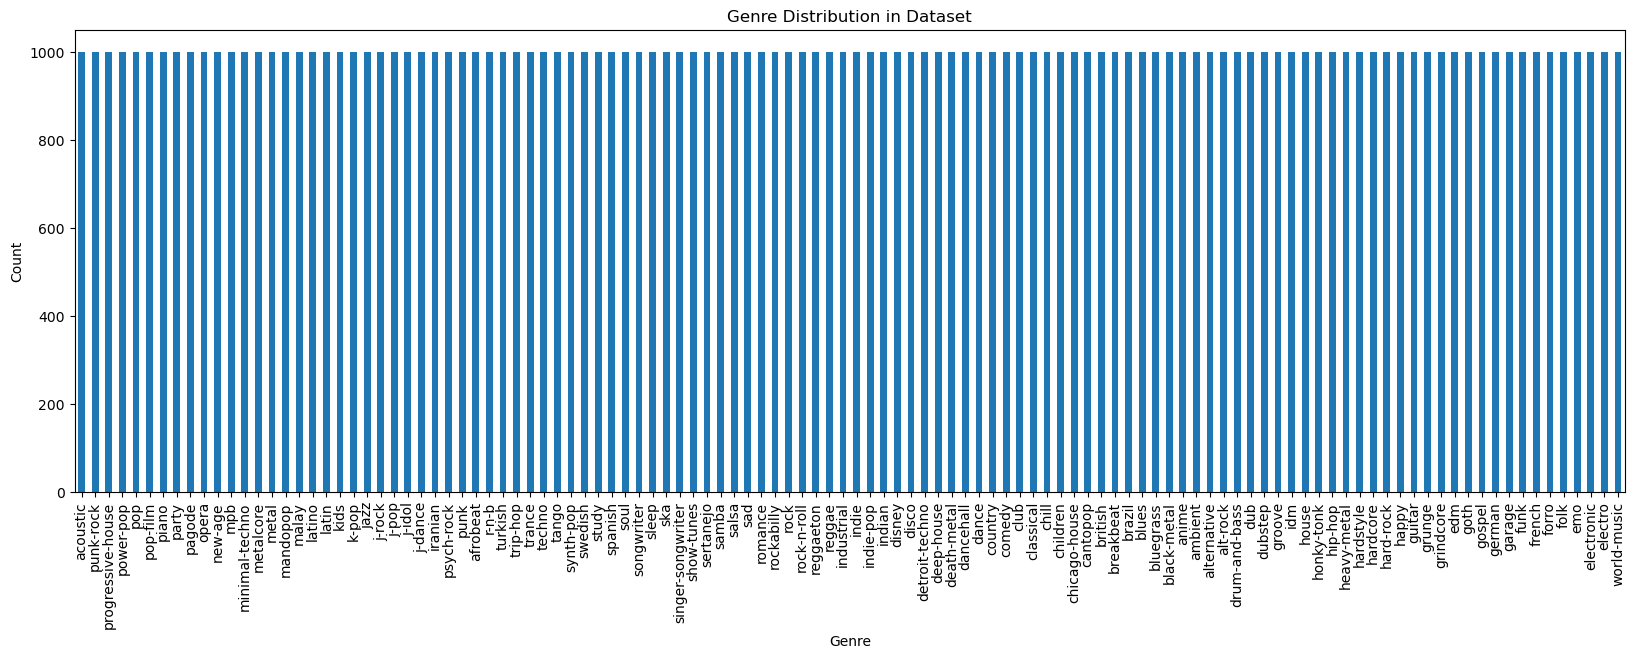

In [13]:
# Plot distribution of genres (Dataset 1)
# VERY BALANCE
plt.figure(figsize=(20, 6))
metadata_df_filled['track_genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution in Dataset')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [14]:
metadata_df_filled.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


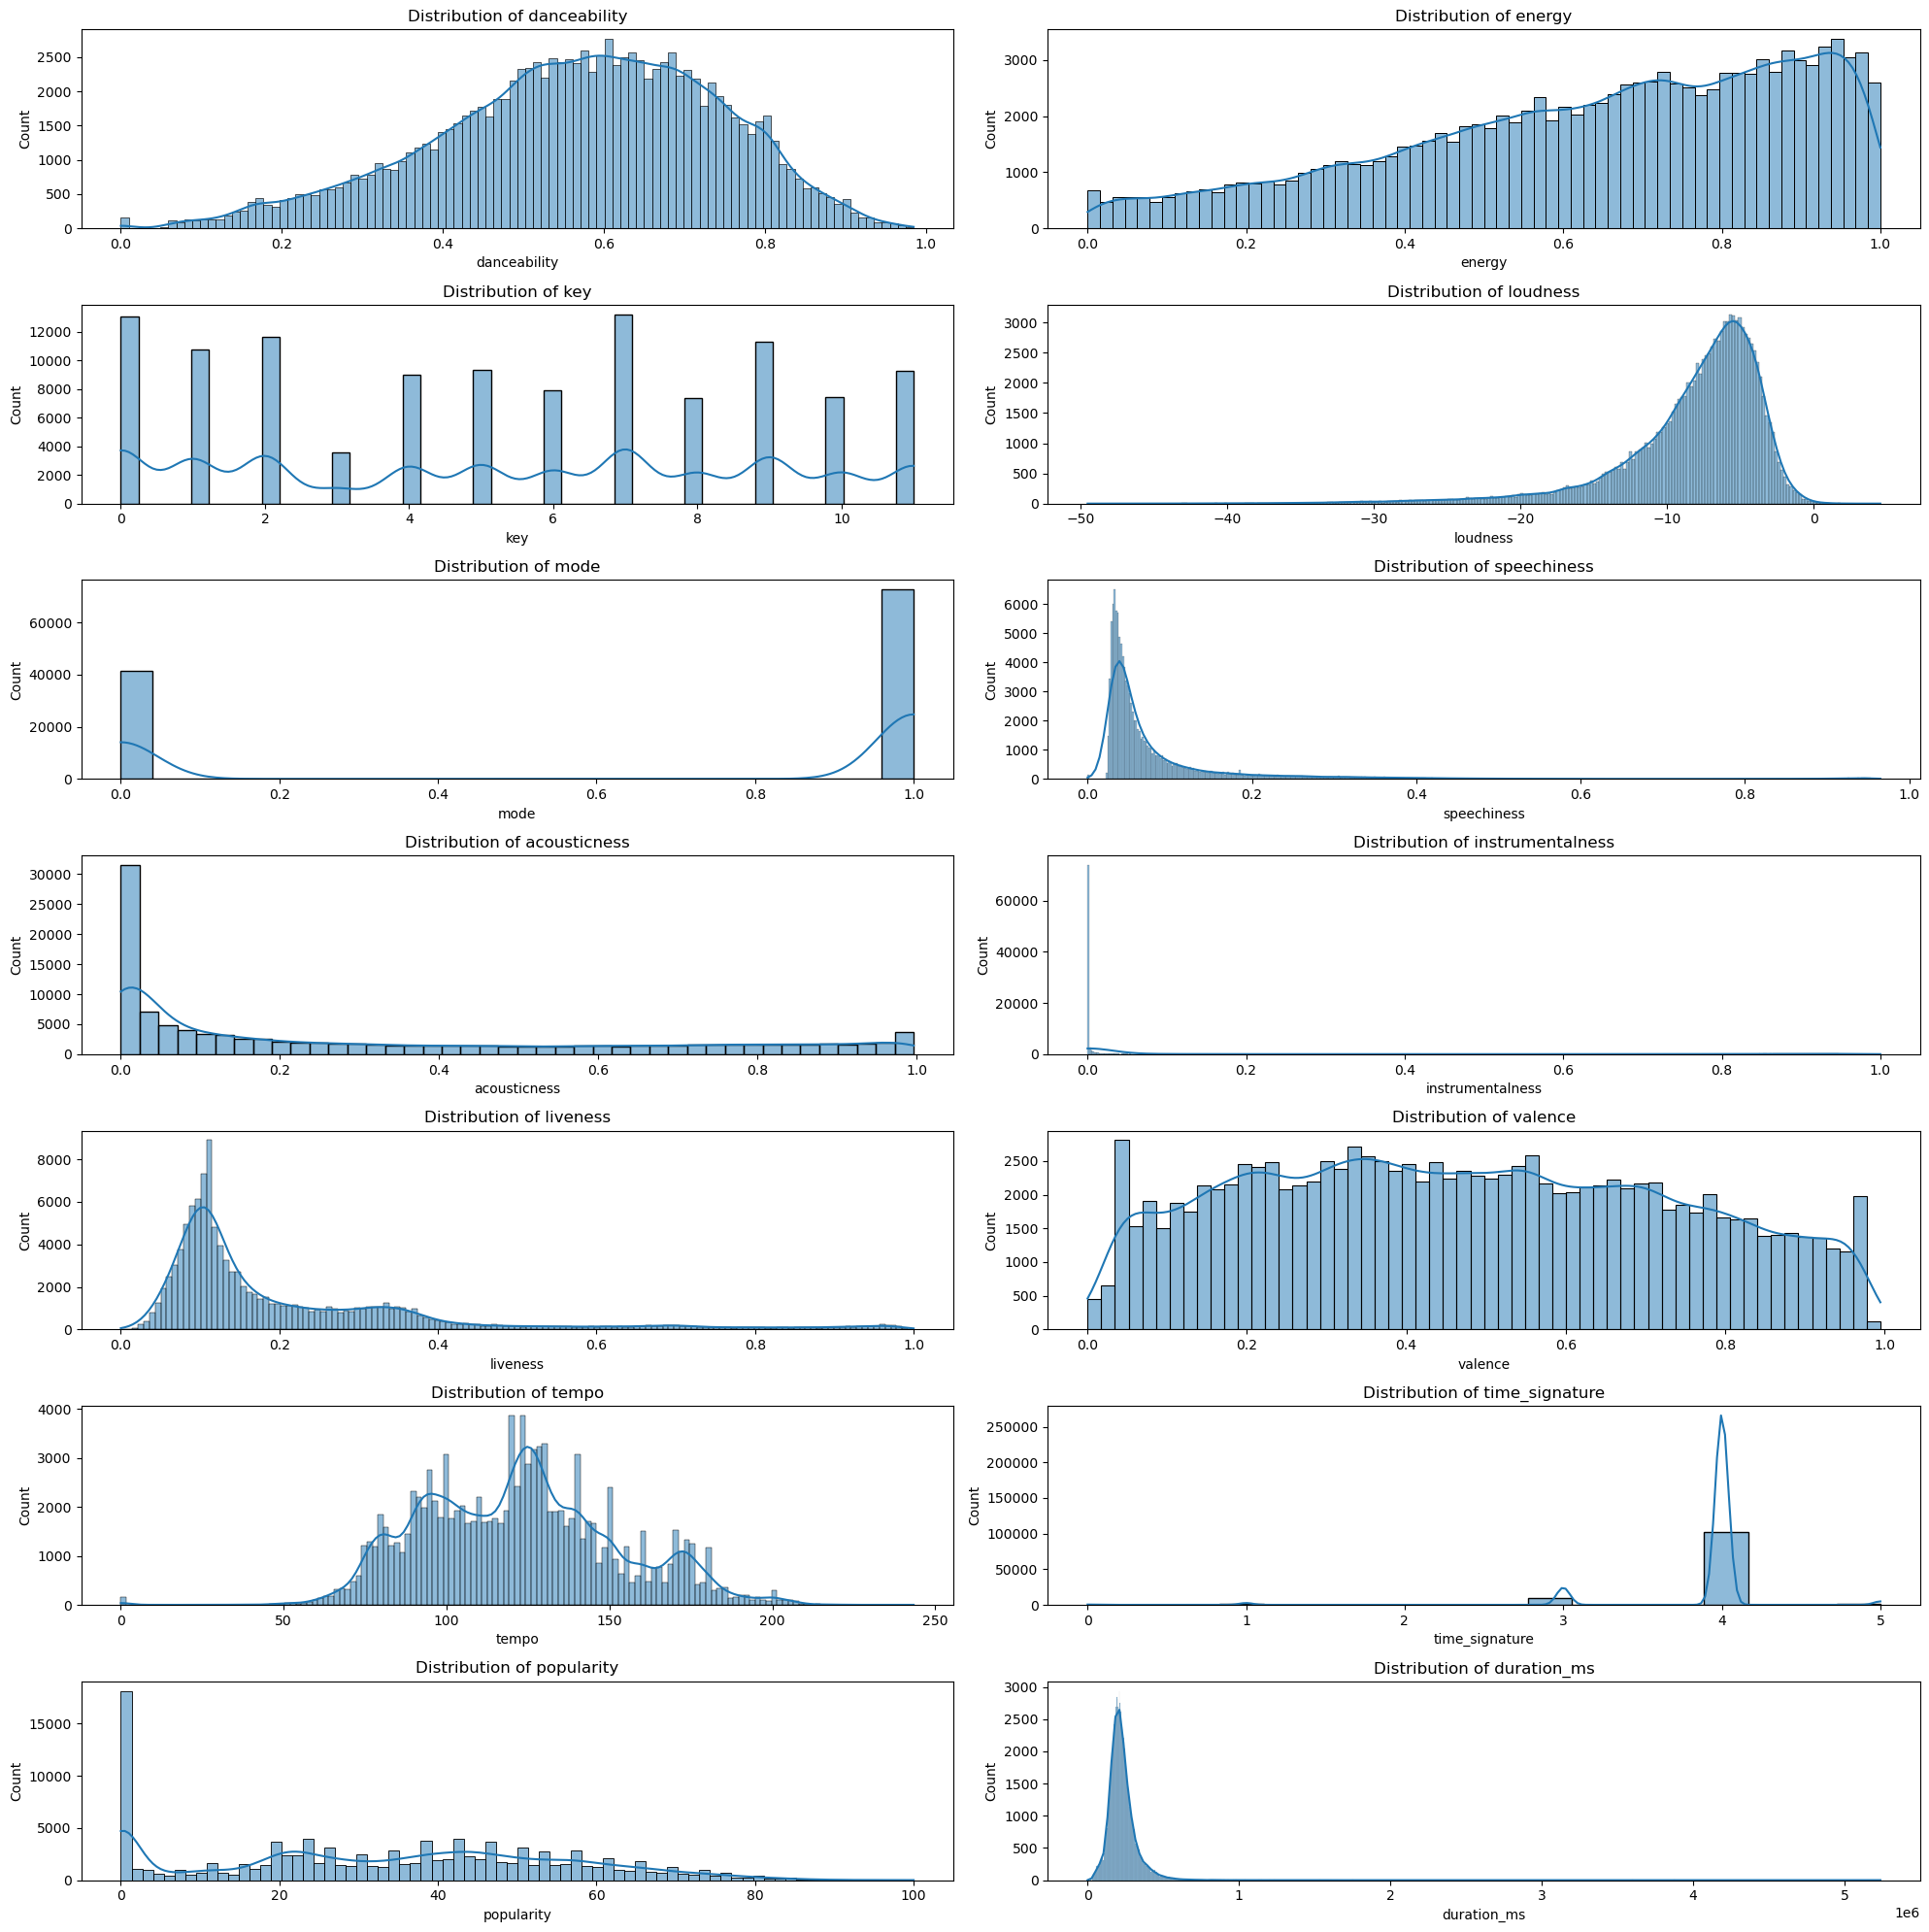

In [15]:
# visualizing the attributes
numberical_att=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','popularity','duration_ms']
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numberical_att):
    plt.subplot(7, 2, i + 1)
    sns.histplot(metadata_df_filled[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

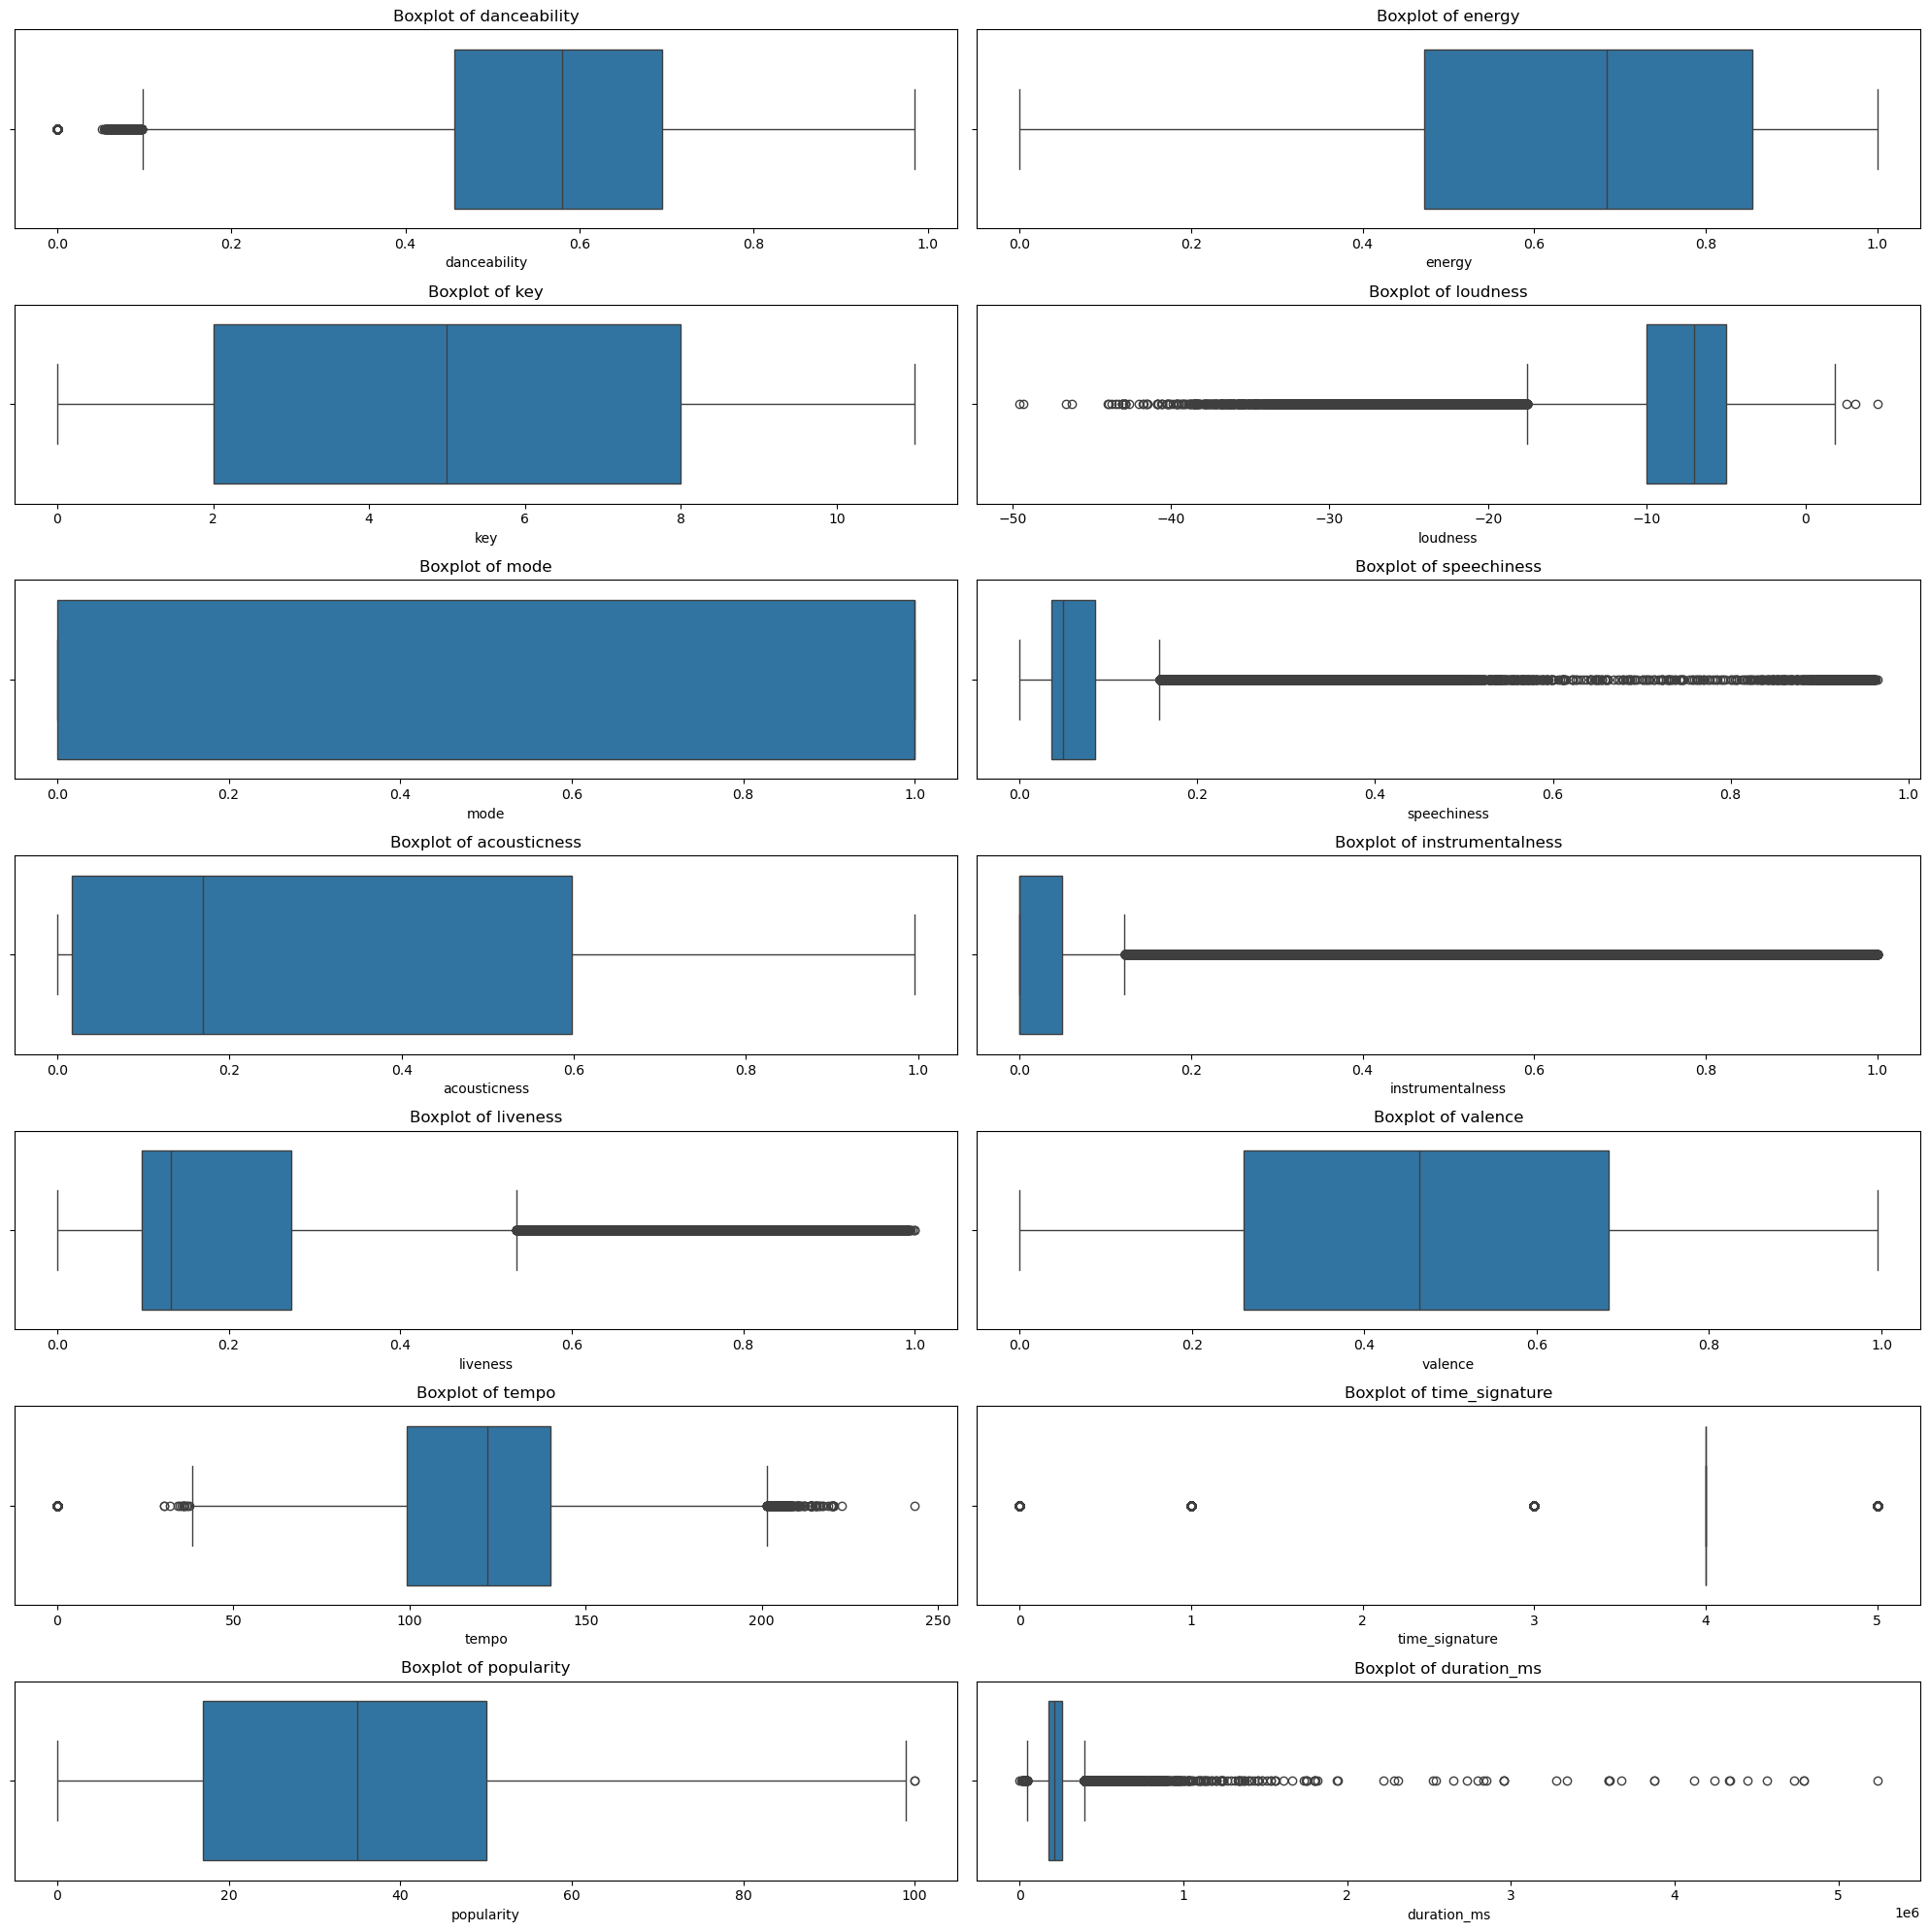

In [16]:
# boxplot for outliers detection
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numberical_att):
    plt.subplot(7, 2, i + 1)
    sns.boxplot(x=metadata_df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [17]:
# outlier!
metadata_df_filled[metadata_df_filled['duration_ms'] == 0]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,Unknown,Unknown,Unknown,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [18]:
# it seems okay if the population is equal to 0
metadata_df_filled[metadata_df_filled['popularity'] == 0]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,...,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,acoustic
24,24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.667,...,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic
26,26,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,131760,False,0.620,0.309,...,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
27,27,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,273653,False,0.633,0.429,...,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,acoustic
28,28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.620,0.309,...,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113046,113046,3W73vndiqDkaYwYjSMaSWu,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,117226,False,0.696,0.715,...,-7.741,1,0.0314,0.3400,0.000000,0.1800,0.959,130.021,4,world-music
113047,113047,18FIFh4AGPC2zDLLFkJp4j,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,175426,False,0.581,0.436,...,-7.936,1,0.0443,0.2320,0.000000,0.0547,0.412,120.138,4,world-music
113048,113048,6xw4sP2mGqAtVYZkBojxcI,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,193653,False,0.413,0.437,...,-7.983,0,0.0327,0.0420,0.000036,0.1460,0.102,120.259,4,world-music
113049,113049,6E7Ix5jkd6uzfoxuvcI8Ww,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,217120,False,0.607,0.884,...,-4.059,1,0.0489,0.0230,0.000000,0.2260,0.555,139.988,4,world-music


In [19]:
# replace the 0 to mean value (for the duration_ms)
mean_duration = metadata_df_filled[metadata_df_filled['duration_ms'] > 0]['duration_ms'].mean()
metadata_df_filled['duration_ms'] = metadata_df_filled['duration_ms'].replace(0, mean_duration)

In [20]:
# check the row
metadata_df_filled[metadata_df_filled['Unnamed: 0']==65900]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,Unknown,Unknown,Unknown,0,228031.153387,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [21]:
metadata_df_filled.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


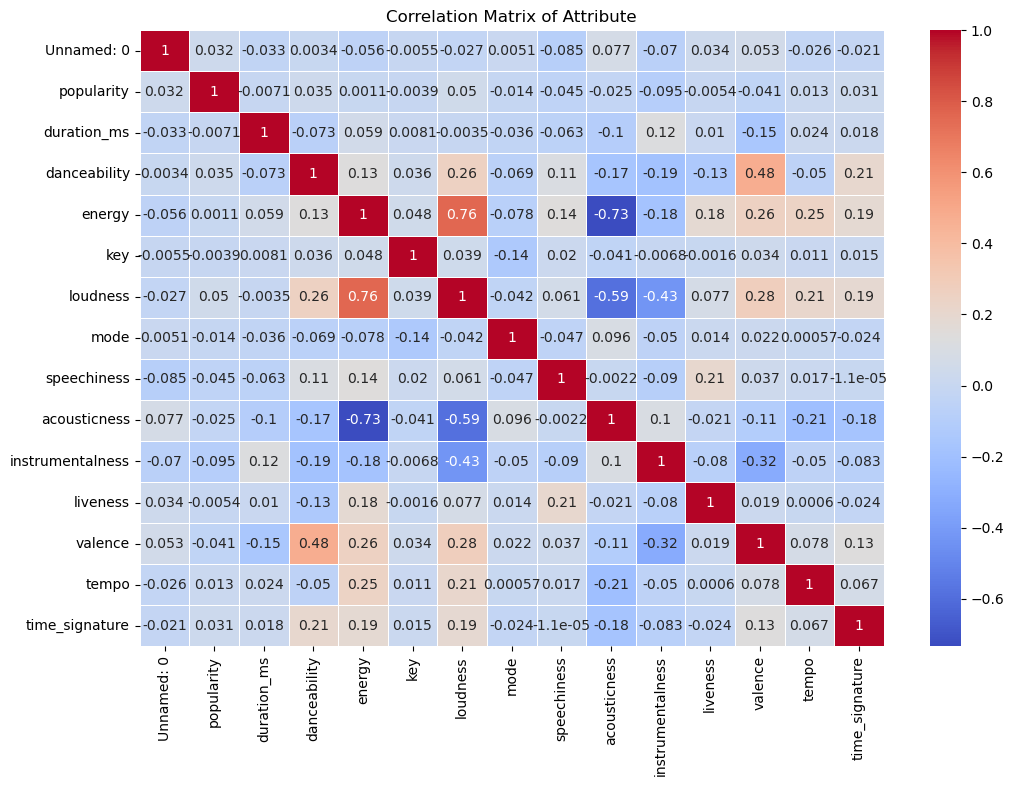

In [22]:
# Correlation matrix for numerical features
numerical_df = metadata_df_filled.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Attribute')
plt.show()

In [23]:
def load_images_and_labels(base_path):
    data = []
    
    for genre_path in glob.glob(os.path.join(base_path, '*')):
        genre = os.path.basename(genre_path)  # Get the genre name
        
        for img_path in glob.glob(os.path.join(genre_path, '*.jpg')):
            try:
                img = Image.open(img_path)
                img = img.resize((128, 128))  # Resize for consistency
                data.append((np.array(img), genre))  # Append (image, label) tuple to the list
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                
    return data

image_data = load_images_and_labels('Datasets/album_cover')

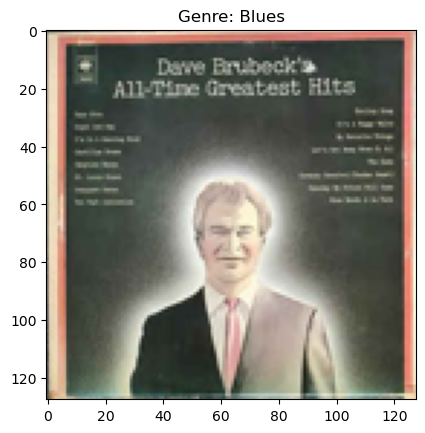

In [24]:
# Extract the first image and its label
first_image = image_data[1][0]
first_label = image_data[1][1]

# Display the image
plt.imshow(first_image)
plt.title(f"Genre: {first_label}")
plt.show()

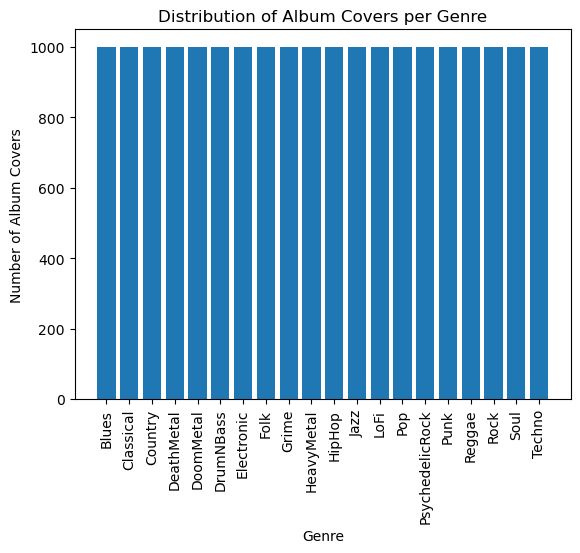

In [28]:
# Assuming image_data is a list of tuples (image_array, genre)
genre_counts = defaultdict(int)

# Iterate through the list and count the occurrences of each genre
for _, genre in image_data:
    genre_counts[genre] += 1

# Plot the distribution of album covers by genre
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xlabel('Genre')
plt.ylabel('Number of Album Covers')
plt.title('Distribution of Album Covers per Genre')
plt.xticks(rotation=90)
plt.show()

In [31]:
# to check all images are in the same format (not corrupted)
for img, genre in image_data:
    if img is None or img.size == 0:  # Checking if the image is None or empty
        print(f"Corrupted image in genre {genre}")